In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

In [2]:
dataset = pd.read_csv('homework_data_set.csv')
dataset.head()

,Unnamed: 0,advertiser_id,assigned,date_assignment_starts,date_assignment_ends,first_revenue_date,date_created,age,assign_days,revenue
0,0,485,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-07-14,3855,138,NaN
1,1,598,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-08-02,3836,138,NaN
2,2,673,1,2017-02-01 00:00:00.000000,2017-04-28 15:36:30.000000,NaN,2006-08-17,3821,86,NaN
3,3,813,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-09-12,3795,138,NaN
4,4,1132,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-11-02,3744,138,NaN


In [3]:
dataset.rename(columns={'Unnamed: 0':'index'}, inplace=True)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77891 entries, 0 to 77890
Data columns (total 10 columns):
index                     77891 non-null int64
advertiser_id             77891 non-null int64
assigned                  77891 non-null int64
date_assignment_starts    77891 non-null object
date_assignment_ends      77891 non-null object
first_revenue_date        8433 non-null object
date_created              77891 non-null object
age                       77891 non-null int64
assign_days               77891 non-null int64
revenue                   3340 non-null float64
dtypes: float64(1), int64(5), object(4)
memory usage: 5.9+ MB


In [5]:
dataset.isnull().sum()

index                         0
advertiser_id                 0
assigned                      0
date_assignment_starts        0
date_assignment_ends          0
first_revenue_date        69458
date_created                  0
age                           0
assign_days                   0
revenue                   74551
dtype: int64

In [6]:
print('Missing ratio of first_revenue_date:', dataset['first_revenue_date'].isnull().sum()/len(dataset))
print('Missing ratio of revenue:', dataset['revenue'].isnull().sum()/len(dataset))

Missing ratio of first_revenue_date: 0.8917333196389827
Missing ratio of revenue: 0.9571195645196493


In [7]:
dataset.first_revenue_date = dataset.first_revenue_date.fillna('none')
dataset.revenue = dataset.revenue.fillna(0)
dataset.isnull().sum()

index                     0
advertiser_id             0
assigned                  0
date_assignment_starts    0
date_assignment_ends      0
first_revenue_date        0
date_created              0
age                       0
assign_days               0
revenue                   0
dtype: int64

## Question 1
There are 77891 leads in the dataset, 37079 leads are assigned (47.6% of all leads), 40812 leads are unassigned (52.4% of all leads). 4.2% assigned leads have revenue, and 4.3% unassigned leads have revenue.

In [8]:
df_assigned = dataset['revenue'][dataset['assigned']==1]
df_unassigned = dataset['revenue'][dataset['assigned']==0]
print('Total leads: ', len(dataset))
print('Assigned leads: %d, %f of all leads' % (df_assigned.count(), df_assigned.count()/len(dataset)))
print('Unassigned leads: %d, %f of all leads' % (df_unassigned.count(), df_unassigned.count()/len(dataset)))

Total leads:  77891
Assigned leads: 37079, 0.476037 of all leads
Unassigned leads: 40812, 0.523963 of all leads


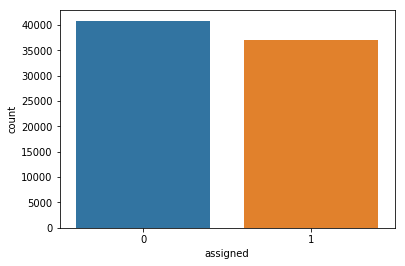

In [9]:
sns.countplot(dataset.assigned)
plt.savefig('age_count')

In [10]:
as_rev = df_assigned[df_assigned != 0]
unas_rev = df_unassigned[df_unassigned!= 0]
print('{}% assigned leads has revenue'.format((as_rev.count()/df_assigned.count())*100))
print('{}% unassigned leads has revenue'.format((unas_rev.count()/df_unassigned.count())*100))

4.220717926589175% assigned leads has revenue
4.349211016367735% unassigned leads has revenue


In [11]:
avg_assigned_rev = as_rev.mean()
avg_unassigned_rev = unas_rev.mean()
print('Average revene of assigned leads:', avg_assigned_rev)
print('Average revene of unassigned leads:', avg_unassigned_rev)

Average revene of assigned leads: 76736860.96102236
Average revene of unassigned leads: 23889416.03661972


## Question 2 
The most important metrics used to estimate the incremental impact the sales representatives had on revenue are:

* Revenue: In order to know how the revenue was impacted, the revenue from assigned/unassigned leads needs to be compared.
* Account Age: Time length of the account might be correlated with revenue, either because of the established partnership with the account holder or just more time available to get the revenue.
* Assignment Age: How much time the sales representative had to work with the account could reflect the established relationship or a problematic account.
* Skill of the sales representatives: not given here, but the soft/business skills of the advertiser can be reflected in higher revenues.


## Question 3
Relationship between account age and revenue.

In [12]:
df_as = dataset[dataset['assigned']==1]
df_unas = dataset[dataset['assigned']==0]
mean_as_age = df_as['age'].mean()
mean_unas_age = df_unas['age'].mean()
print('Average account age of assigned leads:', mean_as_age)
print('Average account age of unassigned leads:', mean_unas_age)

Average account age of assigned leads: 638.0159659106232
Average account age of unassigned leads: 11.90791923943938


In [13]:
def trans_day(d):
    year = int(d/365)
    return year

In [14]:
df = dataset[dataset['revenue']!=0].copy()
df['age_years'] = df['age'].apply(lambda x: trans_day(x))
print(df['age_years'].max())
print(df['age_years'].min())

9
0


c:\users\jelly\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


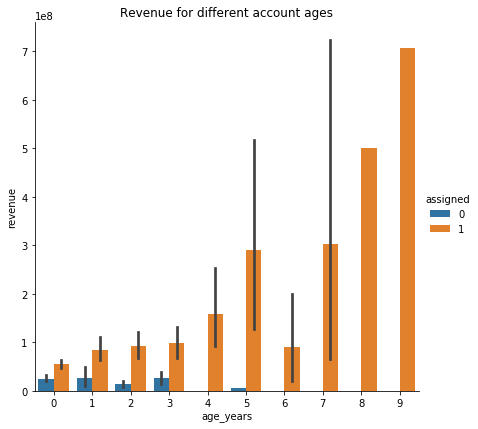

In [15]:
fig = sns.catplot(data=df, x='age_years', y='revenue', hue='assigned', kind='bar', height=6)
plt.title('Revenue for different account ages')
plt.savefig('age_revenue')

* Average revenue of assigned leads is higher than unassigned leads.
* In year 6, average revenue is much less than year 5, 7, 8, 9. 

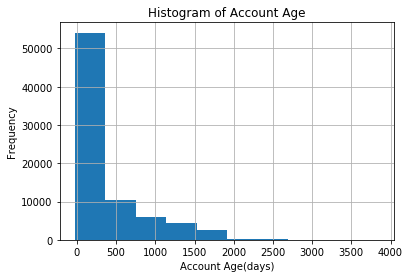

In [16]:
dataset.age.hist()
plt.title('Histogram of Account Age')
plt.xlabel('Account Age(days)')
plt.ylabel('Frequency')
plt.savefig('age_hist')

## Queation 4
Incremental value from assigning a lead to the sales team.

In [17]:
incremental_val = as_rev.mean() - unas_rev.mean()
print('Incremental value from assigning a lead to the sales team is: ', incremental_val)

Incremental value from assigning a lead to the sales team is:  52847444.92440264


## Further analysis
Since the assignment is only has two classes, 0 and 1, I tried Logistic Regression to train preprocessed data and predicted the classes with selected features that might have more impact on assignment.

In [18]:
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
columns = dataset.dtypes[(dataset.dtypes=='object')].index
for col in columns:
    le = LabelEncoder()
    le.fit(list(dataset[col].values))
    dataset[col] = le.transform(list(dataset[col].values))
print(dataset.shape)
dataset.head()

(77891, 10)


,index,advertiser_id,assigned,date_assignment_starts,date_assignment_ends,first_revenue_date,date_created,age,assign_days,revenue
0,0,485,1,0,6501,1636,0,3855,138,0.0
1,1,598,1,0,6501,1636,1,3836,138,0.0
2,2,673,1,0,5702,1636,2,3821,86,0.0
3,3,813,1,0,6501,1636,3,3795,138,0.0
4,4,1132,1,0,6501,1636,4,3744,138,0.0


In [19]:
dataset.describe()

,index,advertiser_id,assigned,date_assignment_starts,date_assignment_ends,first_revenue_date,date_created,age,assign_days,revenue
count,77891.000000,7.789100e+04,77891.000000,77891.000000,77891.000000,77891.000000,77891.000000,77891.000000,77891.000000,7.789100e+04
mean,38945.000000,7.924271e+06,0.476037,0.507183,5986.948672,1588.662824,1773.814356,309.958532,120.482546,2.086209e+06
std,22485.339246,3.918985e+06,0.499429,0.687346,1379.040658,194.461710,467.465878,488.801166,39.527908,3.728792e+07
min,0.000000,4.850000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,-27.000000,-2.000000,0.000000e+00
25%,19472.500000,4.317428e+06,0.000000,0.000000,6501.000000,1636.000000,1553.000000,0.000000,136.000000,0.000000e+00
50%,38945.000000,1.078788e+07,0.000000,0.000000,6501.000000,1636.000000,2076.000000,0.000000,137.000000,0.000000e+00
75%,58417.500000,1.080747e+07,1.000000,1.000000,6501.000000,1636.000000,2077.000000,523.000000,138.000000,0.000000e+00
max,77890.000000,1.119963e+07,1.000000,2.000000,6501.000000,1636.000000,2100.000000,3855.000000,138.000000,6.533791e+09


In [20]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.feature_selection import RFE
X = dataset.drop(['assigned', 'index'], axis=1)
print(X.shape)
y = dataset.assigned
model = lr()
rfe = RFE(model, 3)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_) 
print("Selected Features: %s" % fit.support_) 
print("Feature Ranking: %s" % fit.ranking_)

(77891, 8)
Num Features: 3
Selected Features: [False False False  True False  True  True False]
Feature Ranking: [4 5 2 1 3 1 1 6]


I used the Recursive Feature Elimination (RFE) based on Logistic Regression to choose the first three features that have the most significant impact on assignment. And the first features are 'assigned_days', 'first_revenue_date', and 'age'. 

In [21]:
X_data = X[['age', 'assign_days', 'first_revenue_date']]
Y = dataset['assigned']
poly = PolynomialFeatures(degree=2, interaction_only=True)
x = poly.fit_transform(X_data)

In oder to get higher accuracy, I created poly features to make non-linear factors.

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

In [23]:
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [24]:
print('Accuracy train set: ', model.score(x_train, y_train))

Accuracy train set:  0.8976762100397997


In [25]:
print('Accuracy test set: ', model.score(x_test, y_test))

Accuracy test set:  0.8965240555894342


In [26]:
y_test = y_test.reshape((31157, 1))
pred = pred.reshape((31157, 1))

c:\users\jelly\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


Plot the ROC curve of model

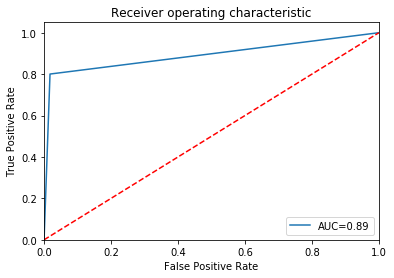

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive, recall, thresholds = roc_curve(y_test, pred)
roc_auc = roc_auc_score(y_test, pred)
plt.plot(false_positive, recall, label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')  
plt.plot([0, 1], [0, 1], 'r--')  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])
plt.title('Receiver operating characteristic')
plt.ylabel('True Positive Rate')  
plt.xlabel('False Positive Rate')
plt.savefig('lr_roc')
plt.show()  

Since the AUC value of trained Logistic Regression model is 0.89, it can be considered the accuracy of model is ideal.